In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import mlib.lib as mlib


In [4]:
glass_data = pd.read_csv('./datasets/glass.csv')

In [5]:
print glass_data.shape

(214, 11)


In [6]:
glass_data.head(5)

,ID,refr,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1


In [7]:
glass_data.drop('ID', axis=1, inplace=True)

In [8]:
predictors = list(glass_data.columns[:-1])
predictors

['refr', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

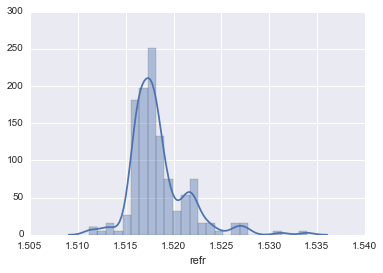

skewness for refr: 1.61401504566




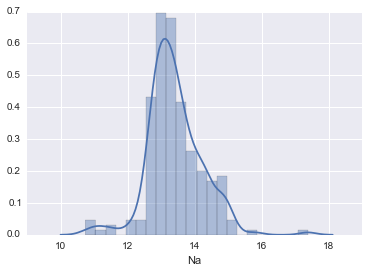

skewness for Na: 0.450991720012




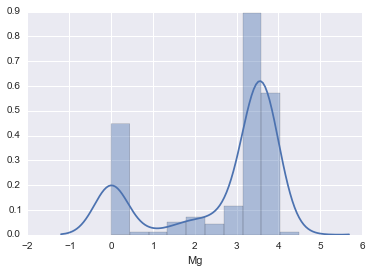

skewness for Mg: -1.1444648496




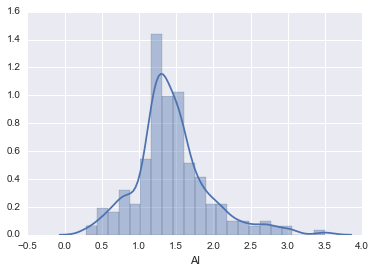

skewness for Al: 0.900917878143




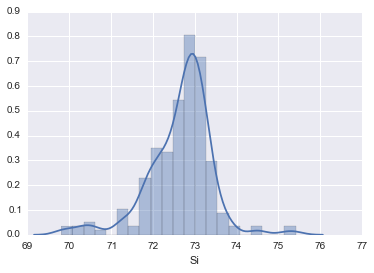

skewness for Si: -0.725317266451




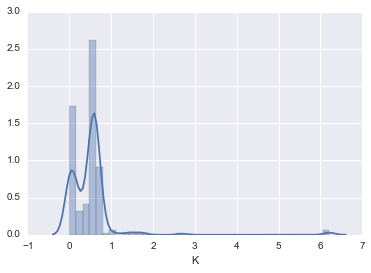

skewness for K: 6.50563583401




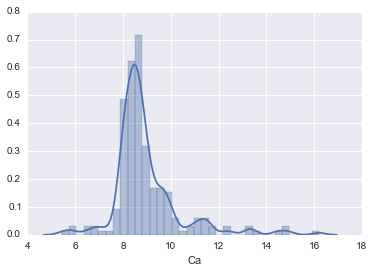

skewness for Ca: 2.03267737553




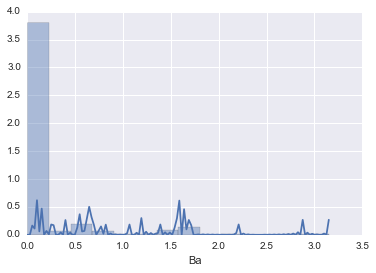

skewness for Ba: 3.39243088944




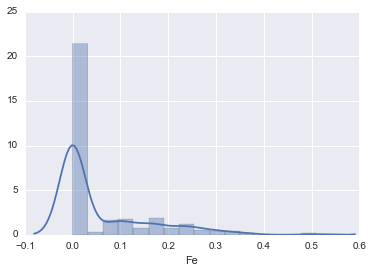

skewness for Fe: 1.7420067618




In [9]:
from scipy.stats import skew, boxcox

for name in predictors:
    sns.distplot(glass_data[name])
    plt.show()
    
    skewness = skew(glass_data[name].values)
    print 'skewness for {}: {}'.format(name, skewness)
    print
    print

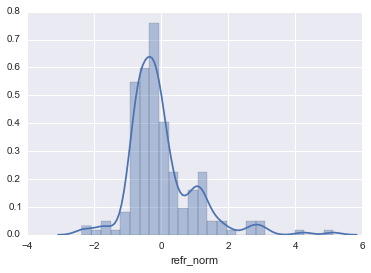

skewness for refr_norm: 1.61401504566




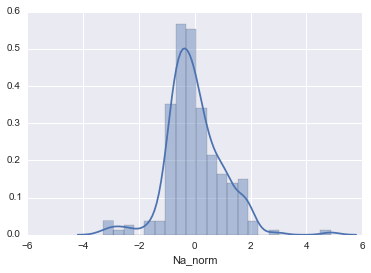

skewness for Na_norm: 0.450991720012




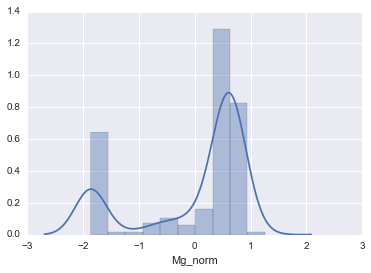

skewness for Mg_norm: -1.1444648496




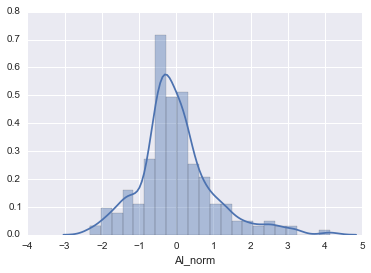

skewness for Al_norm: 0.900917878143




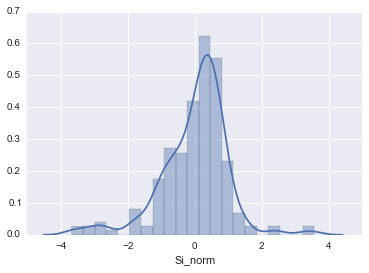

skewness for Si_norm: -0.725317266451




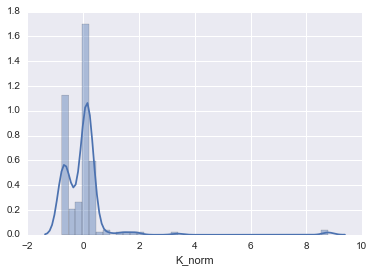

skewness for K_norm: 6.50563583401




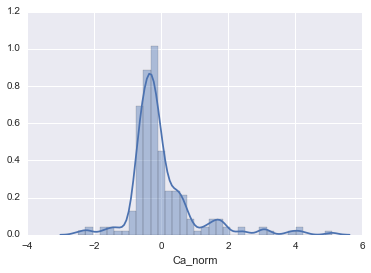

skewness for Ca_norm: 2.03267737553




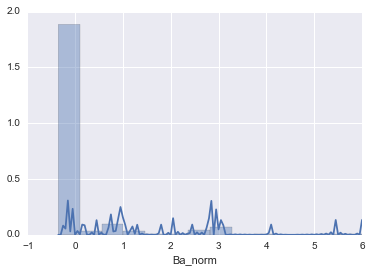

skewness for Ba_norm: 3.39243088944




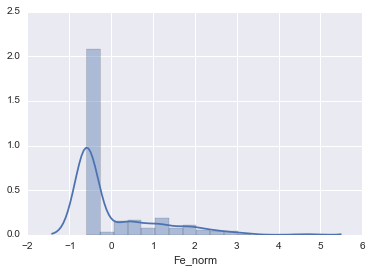

skewness for Fe_norm: 1.7420067618




In [10]:
from sklearn.preprocessing import scale

predictors_norm = map(lambda name: name + '_norm', predictors)
for name in predictors:
    glass_data[name + '_norm'] = scale(glass_data[name])
    
for name in predictors_norm:
    sns.distplot(glass_data[name])
    plt.show()
    
    skewness = skew(glass_data[name].values)
    print 'skewness for {}: {}'.format(name, skewness)
    print
    print

## Correlation lookup.

Plot pairwise predictors distributions as matrix.

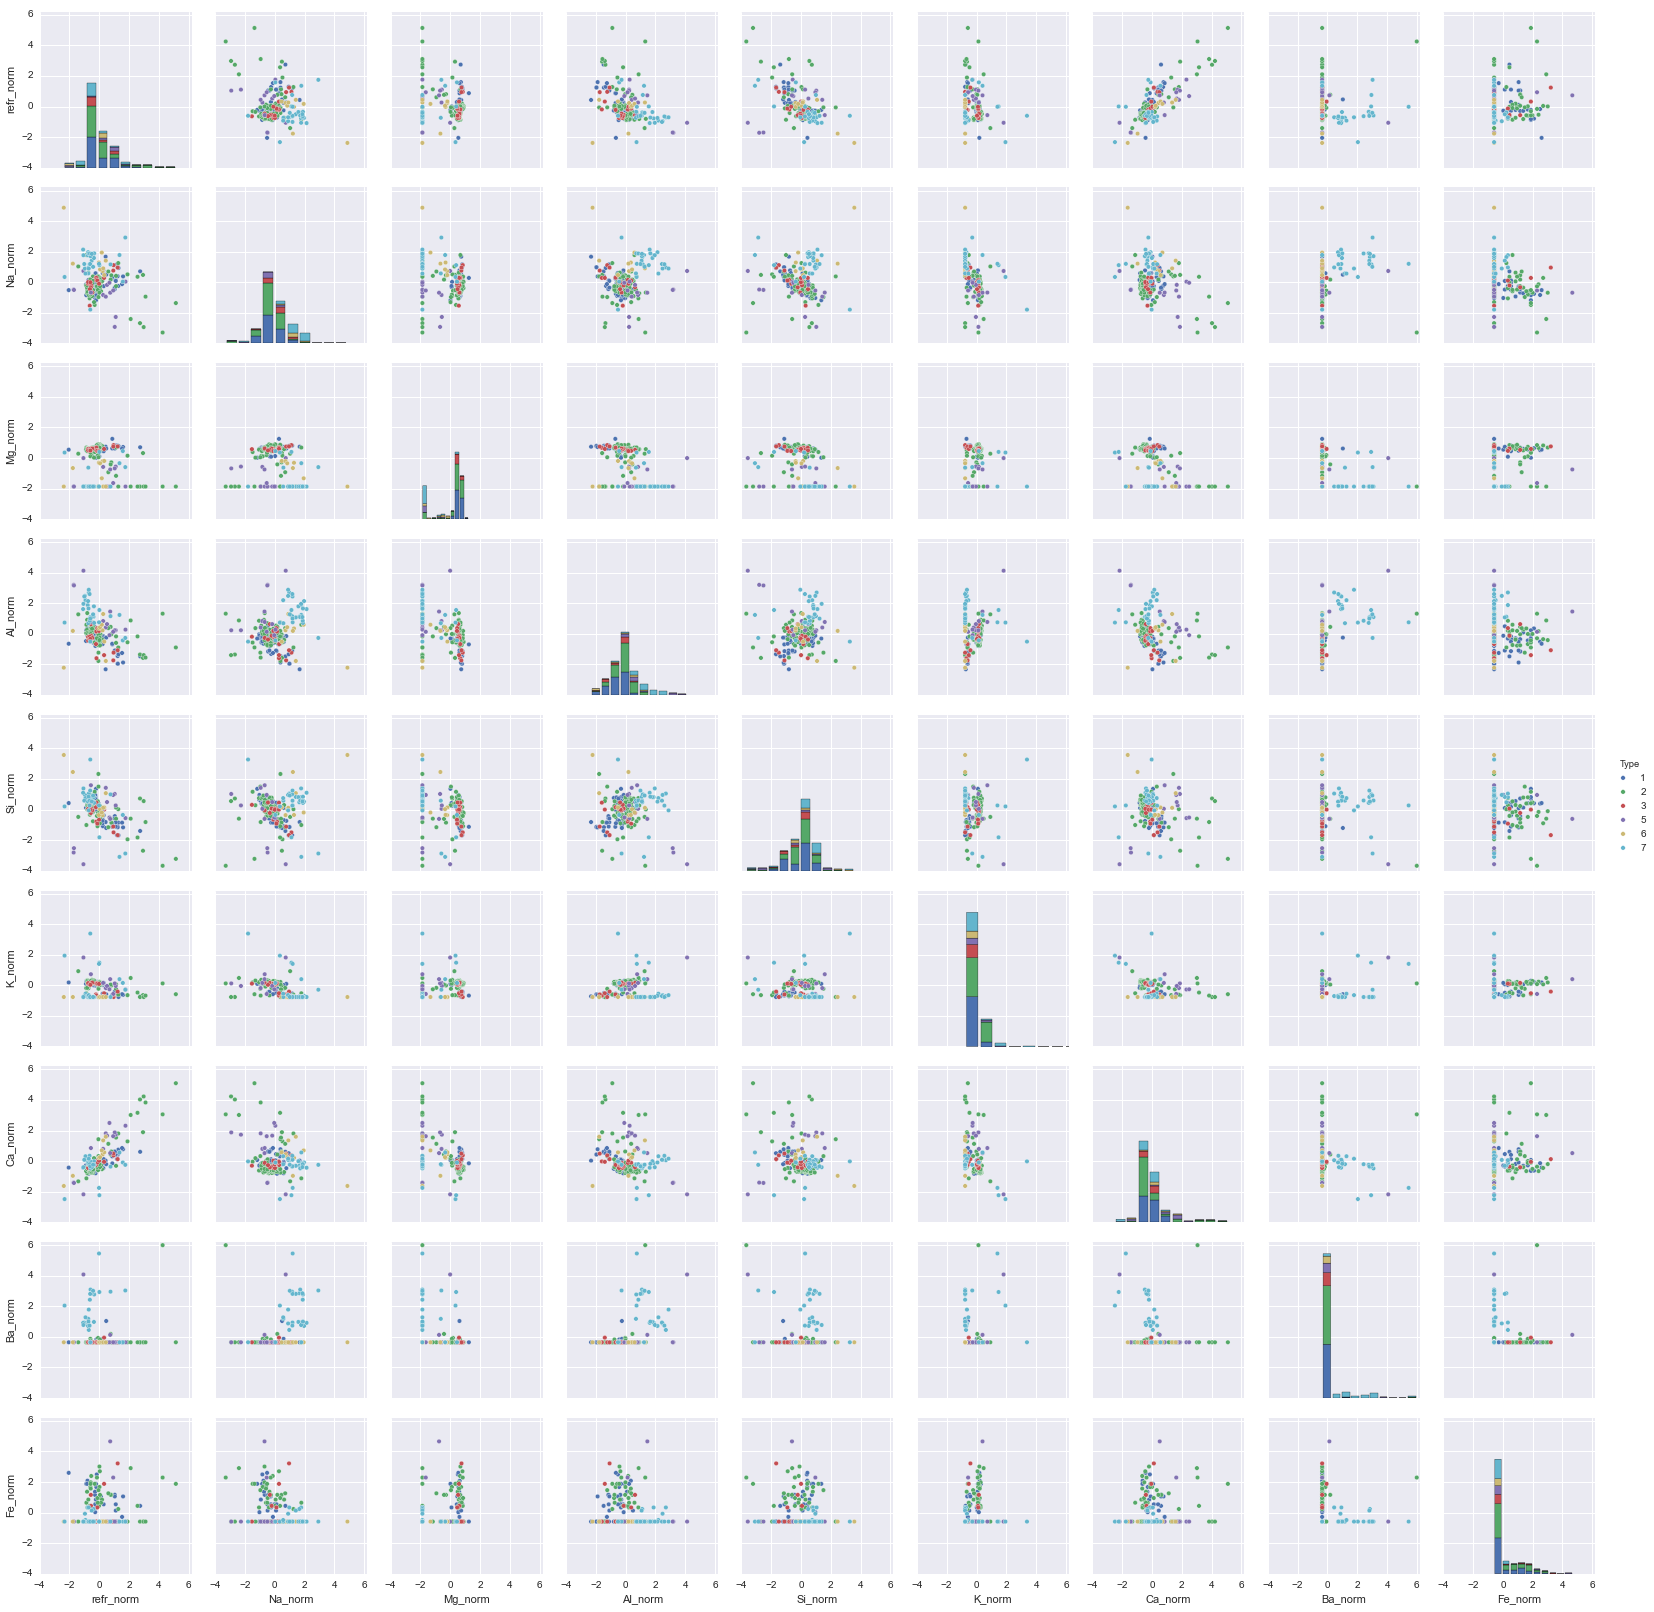

In [11]:
g = sns.pairplot(glass_data, vars=predictors_norm, hue='Type')
g.set(xlim=(-4, 6.2), ylim=(-4, 6.2))

And as separate graphs.

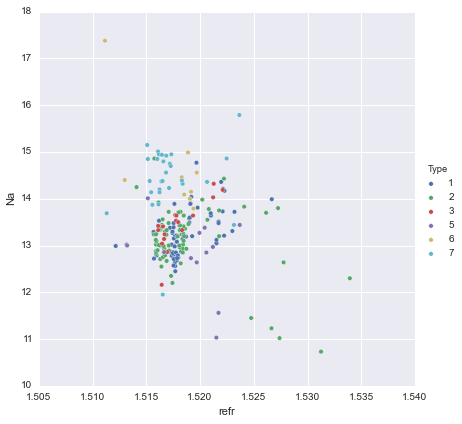

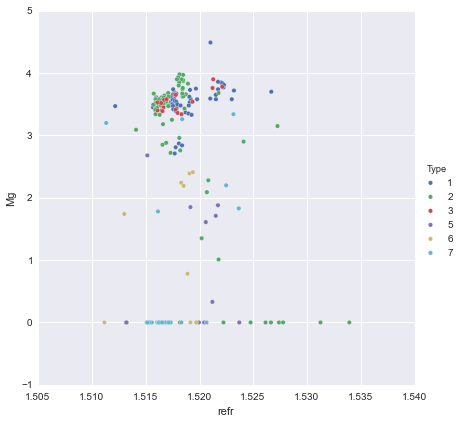

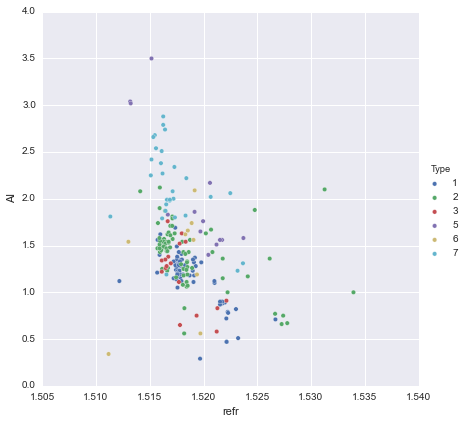

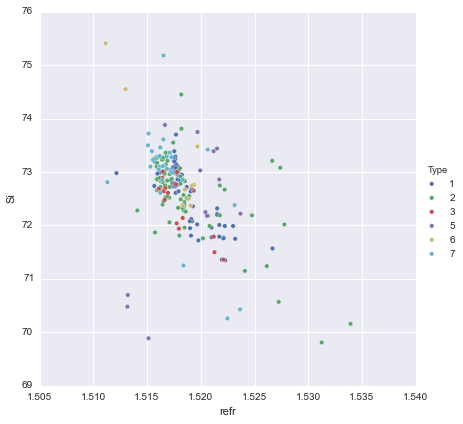

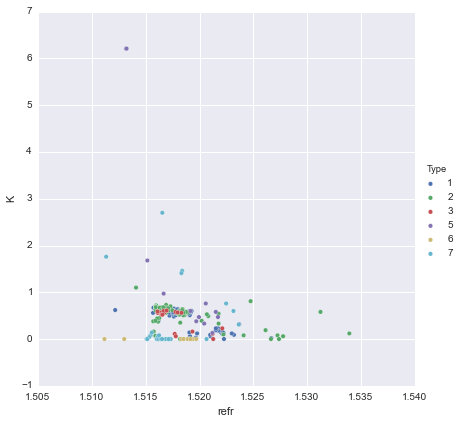

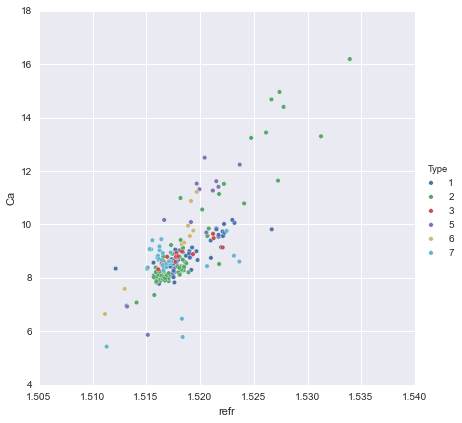

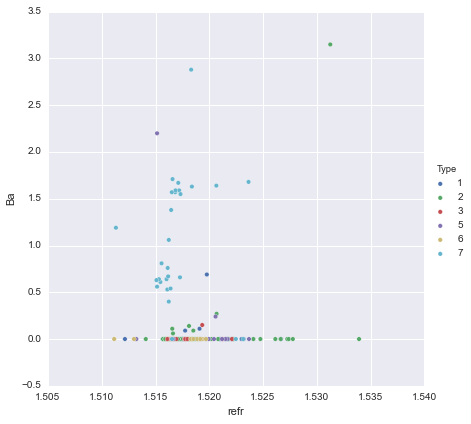

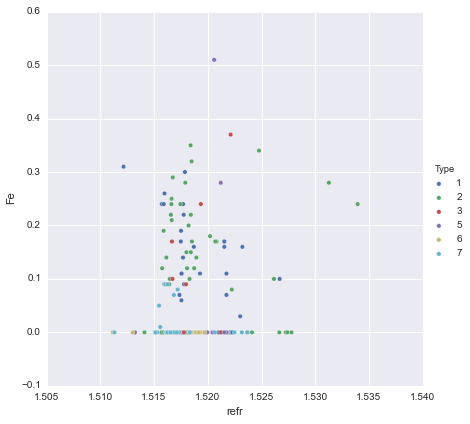

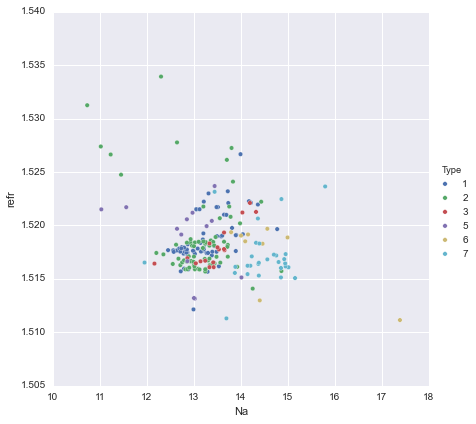

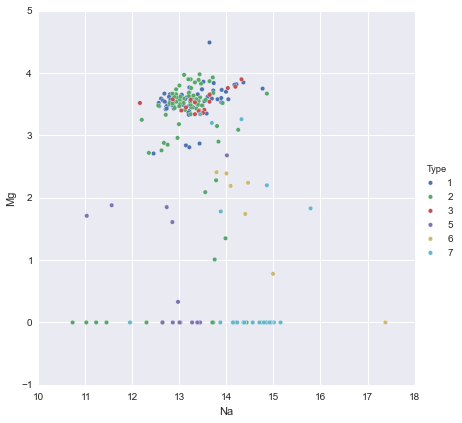

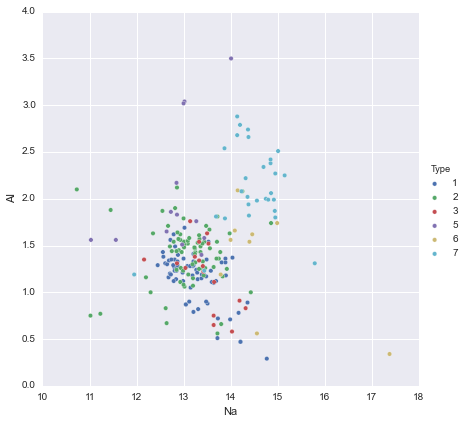

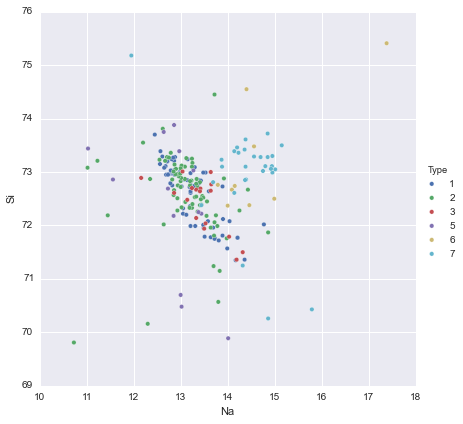

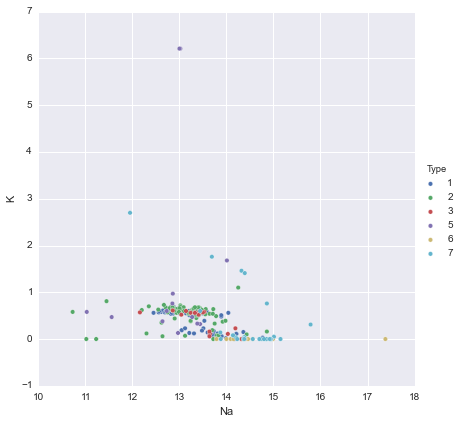

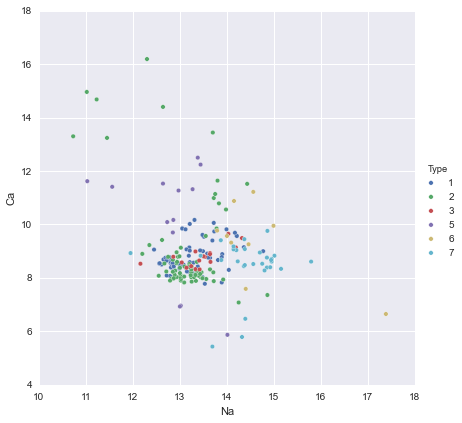

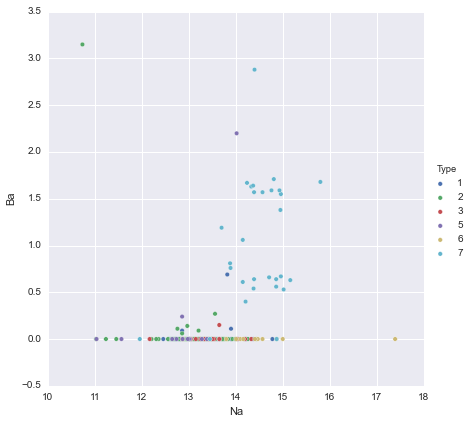

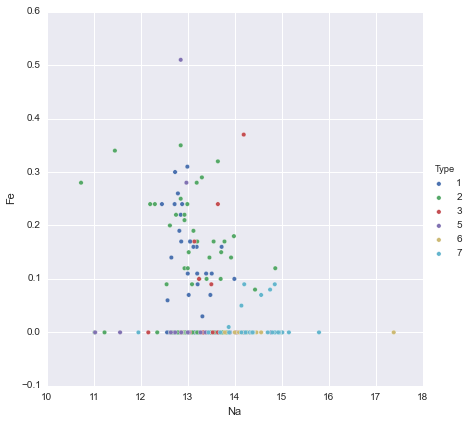

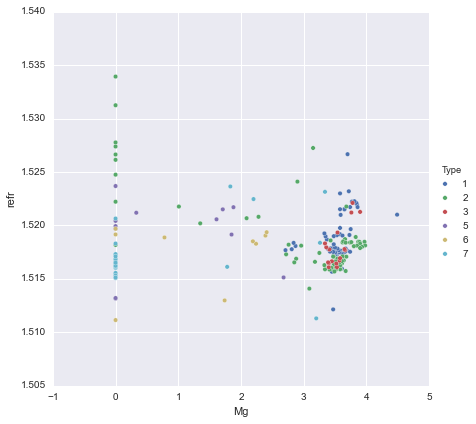

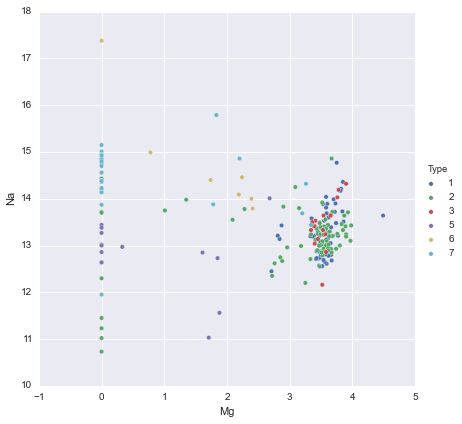

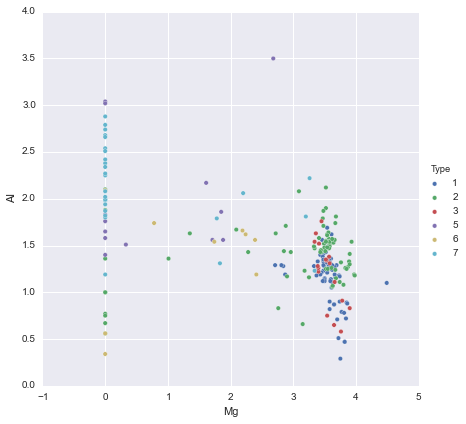

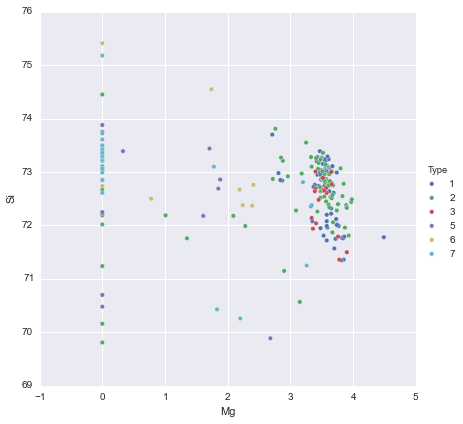

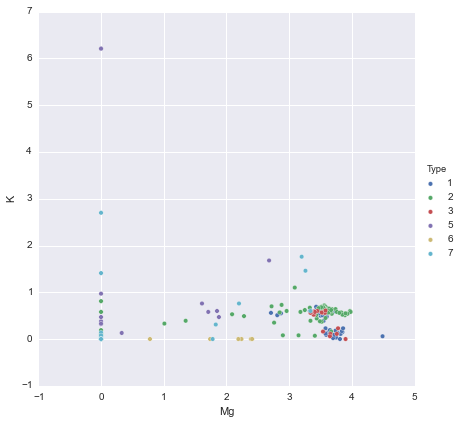

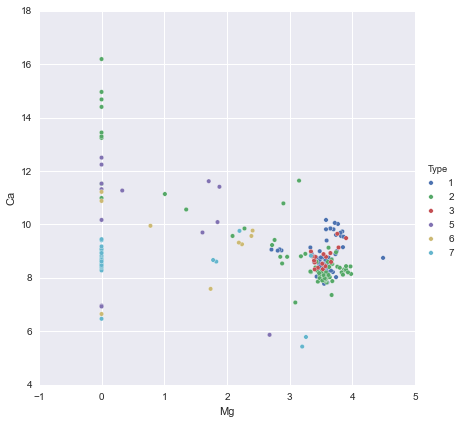

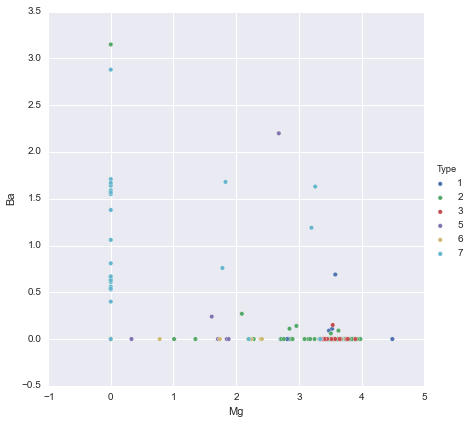

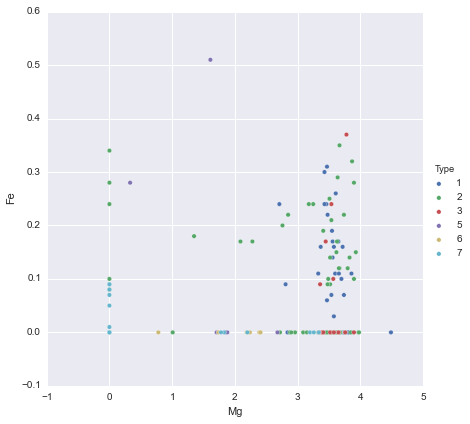

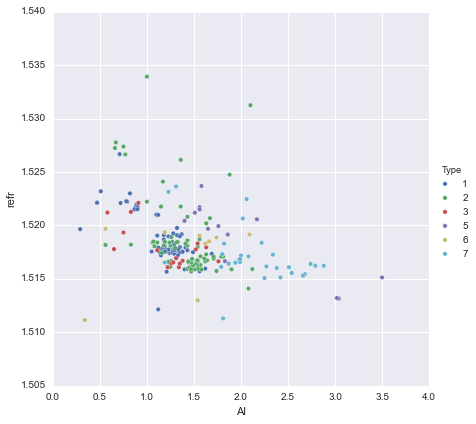

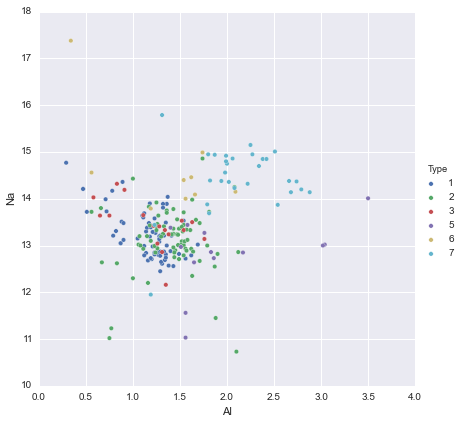

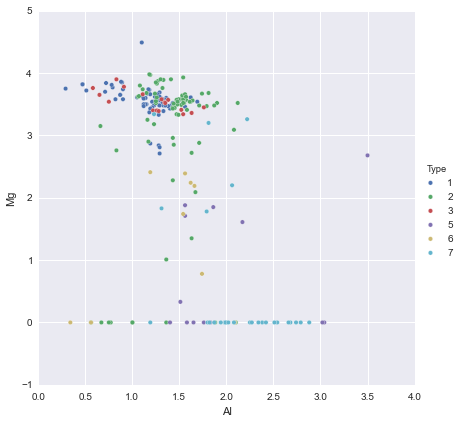

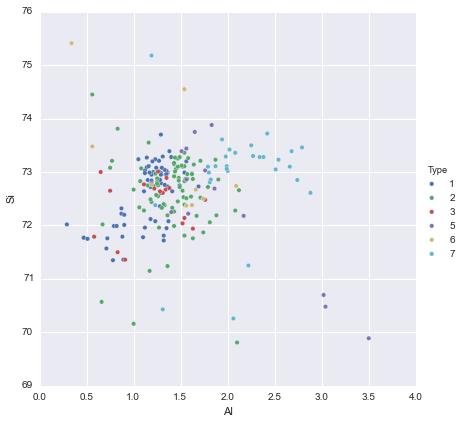

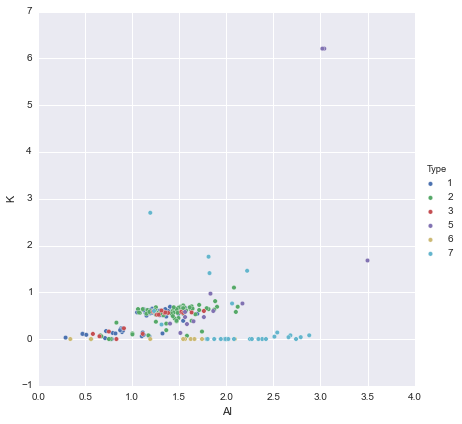

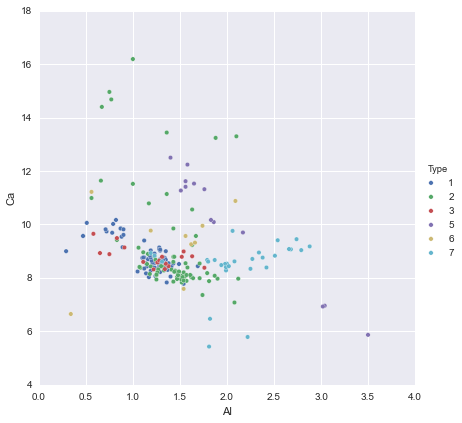

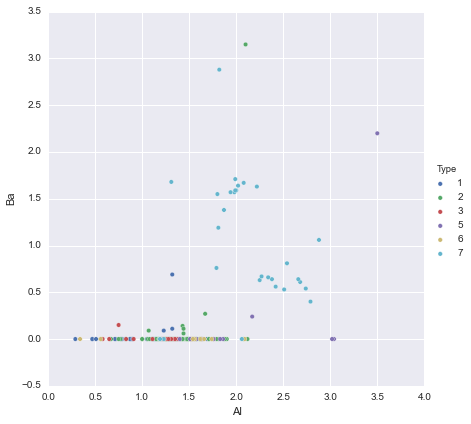

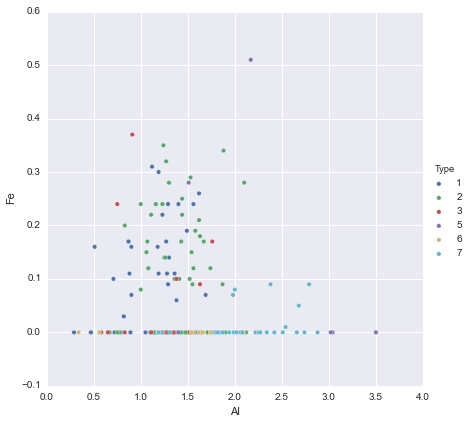

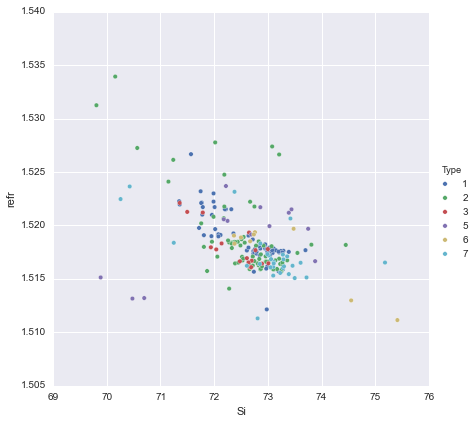

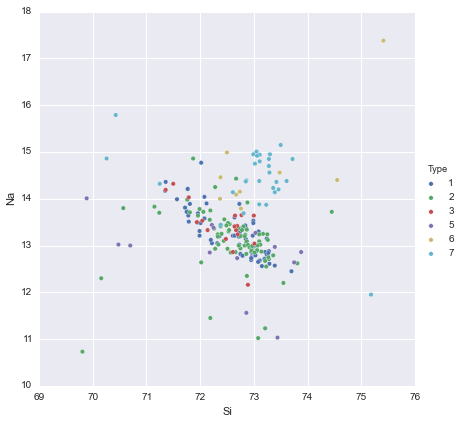

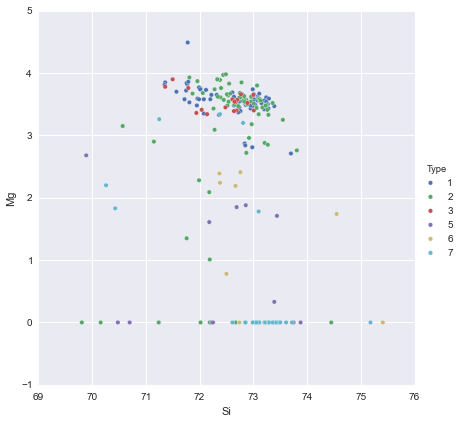

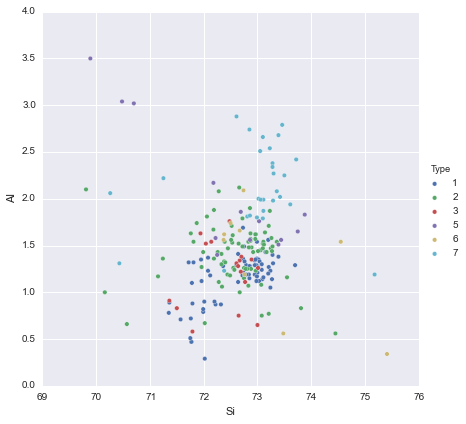

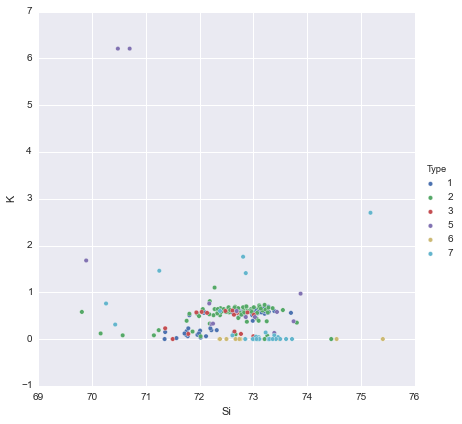

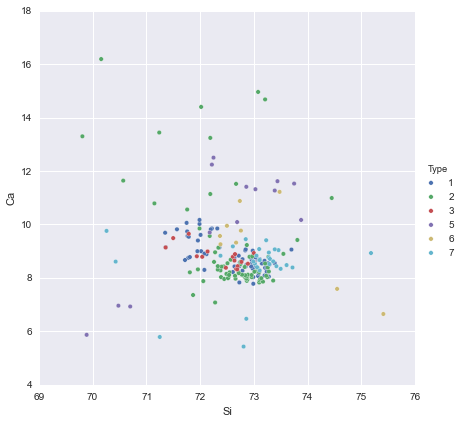

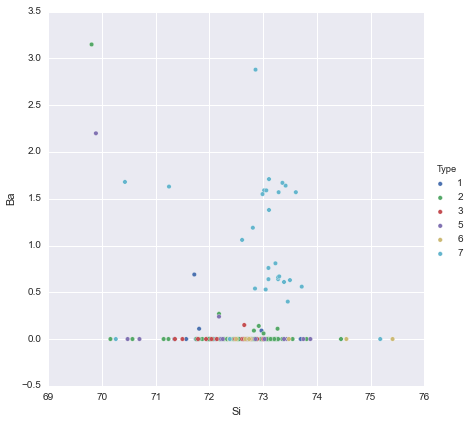

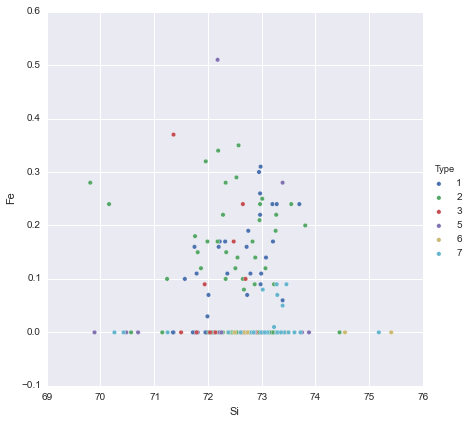

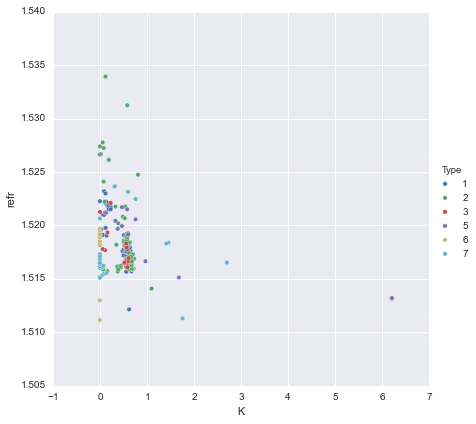

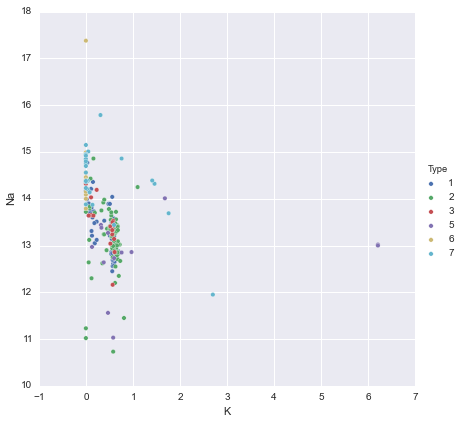

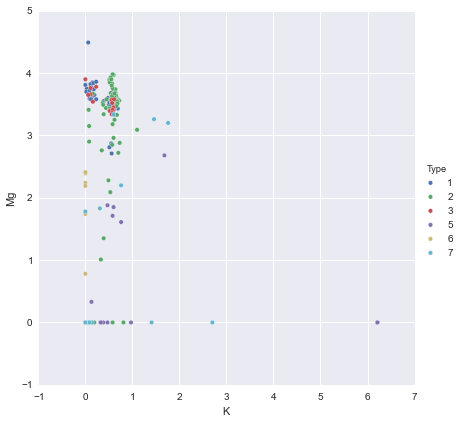

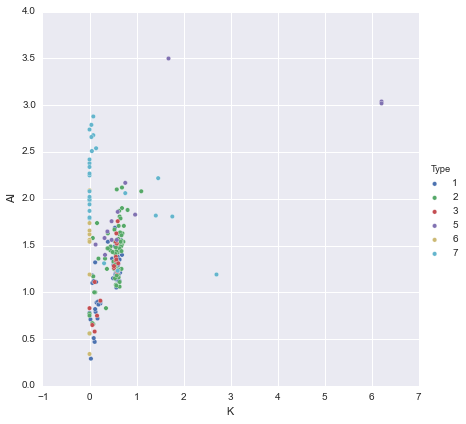

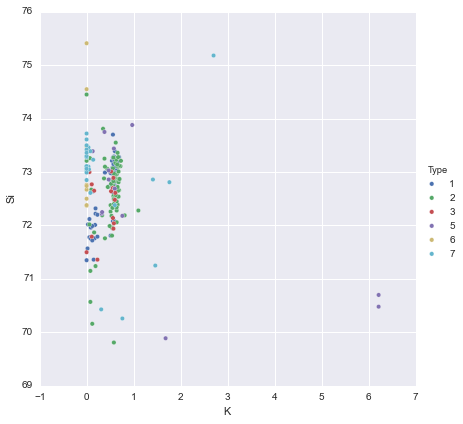

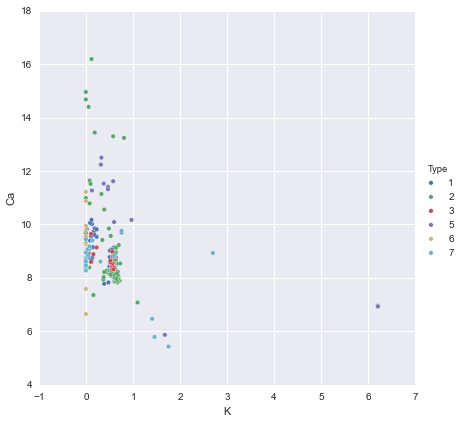

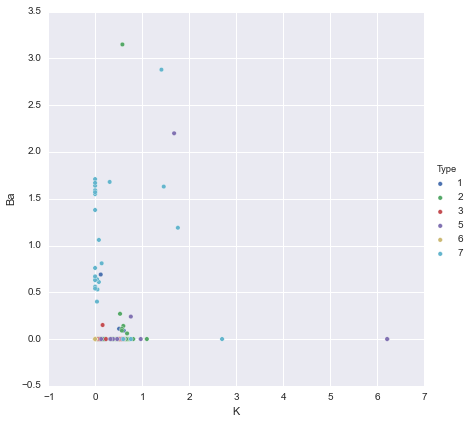

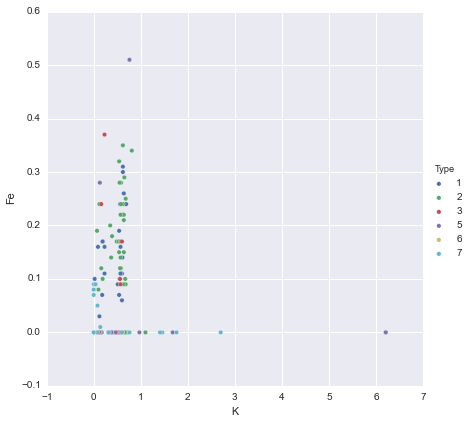

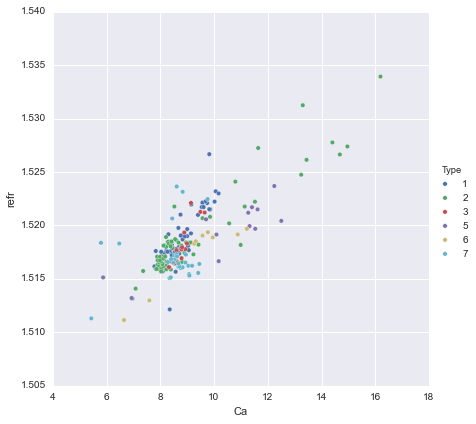

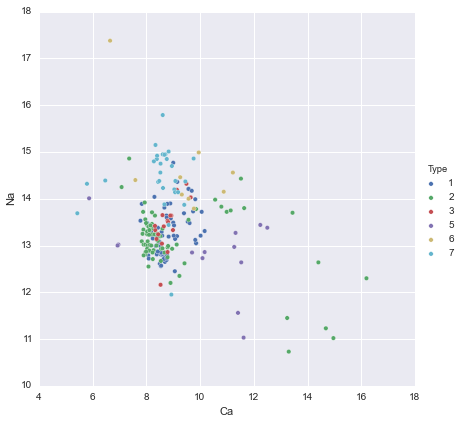

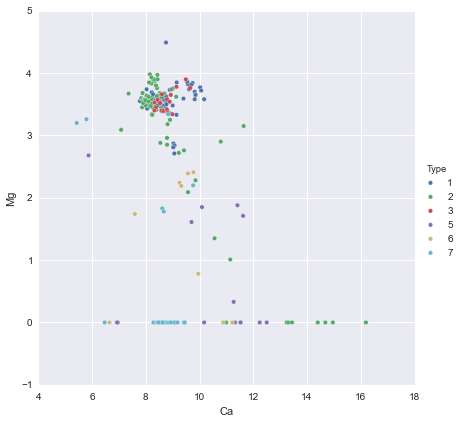

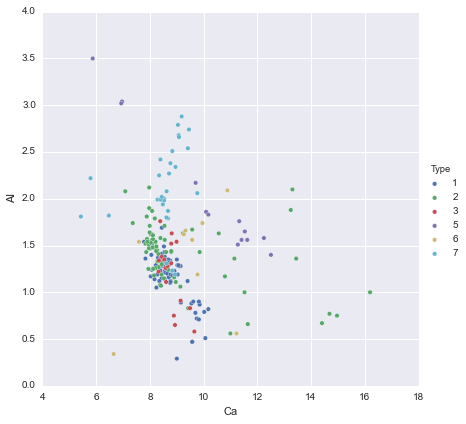

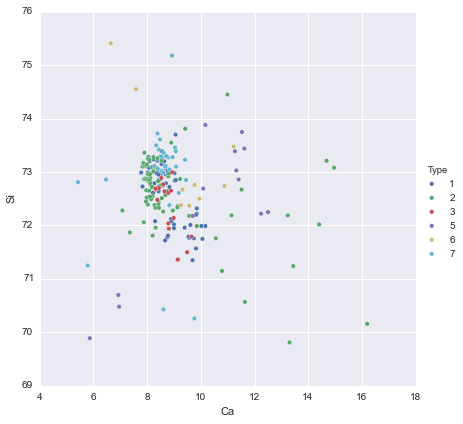

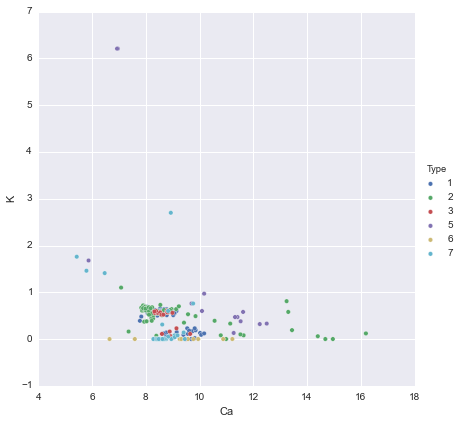

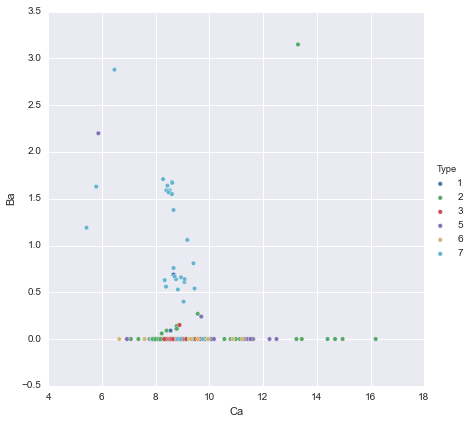

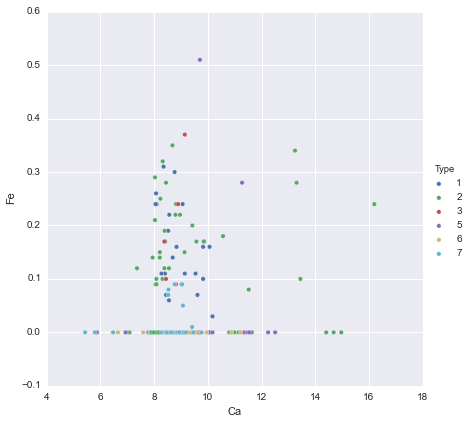

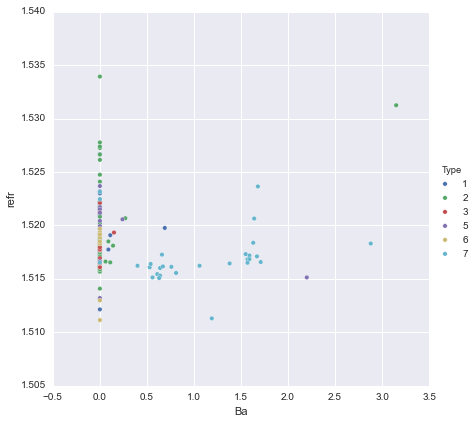

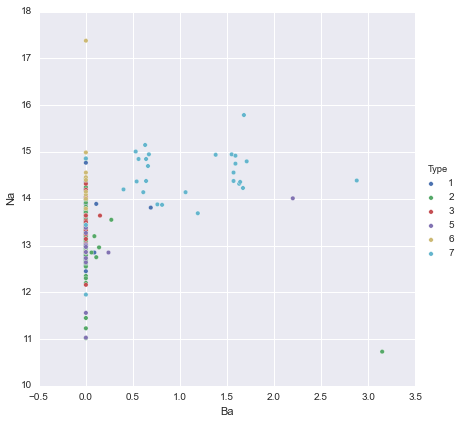

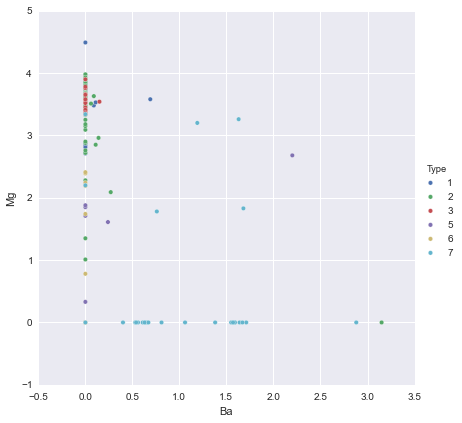

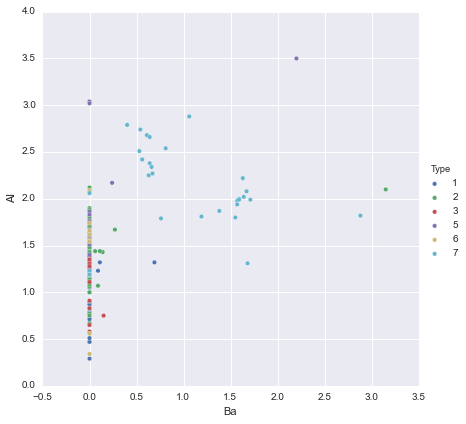

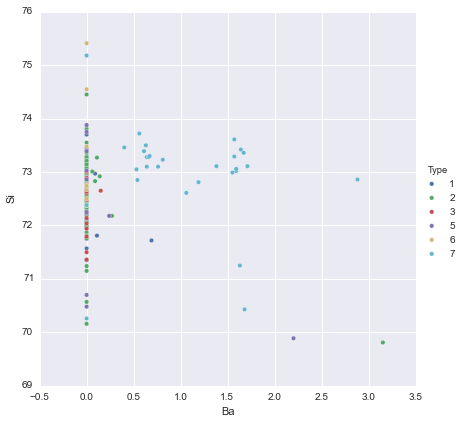

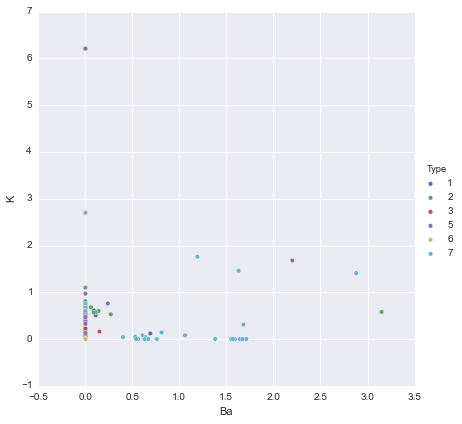

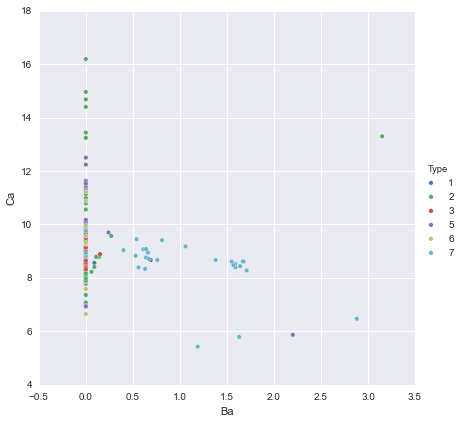

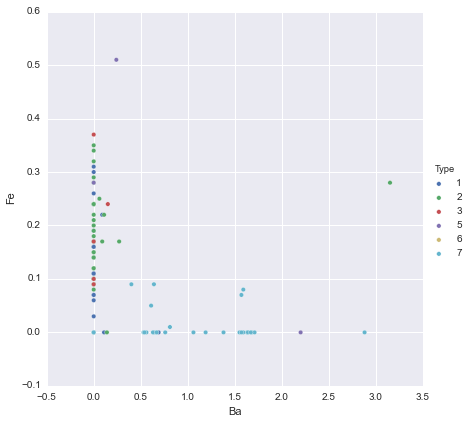

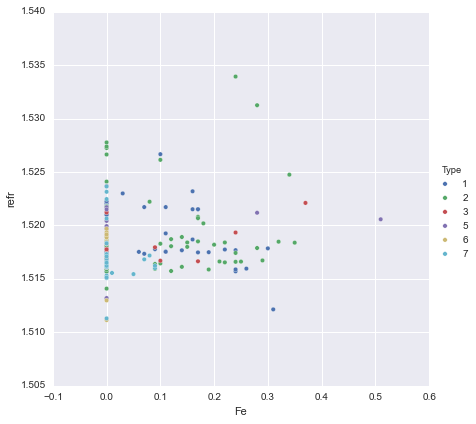

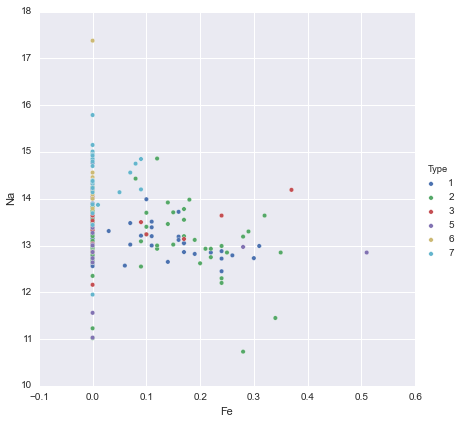

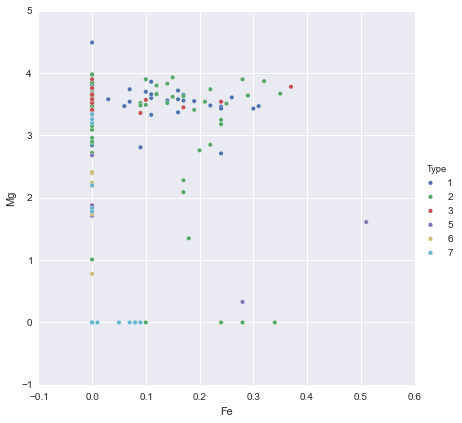

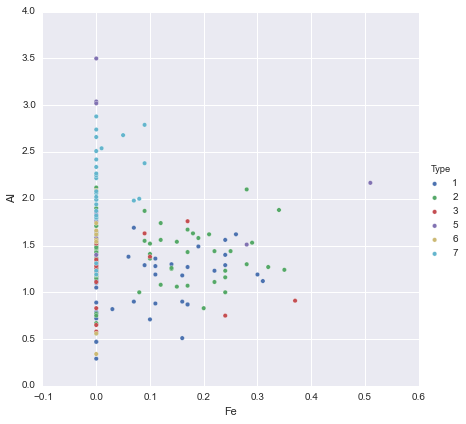

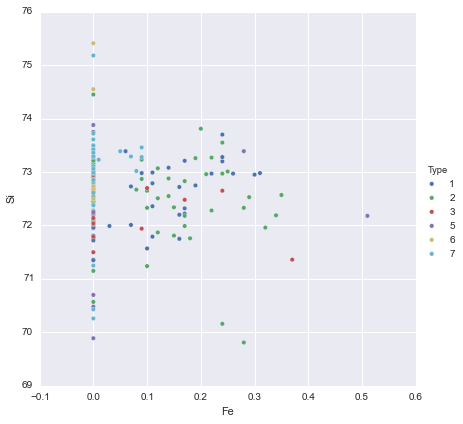

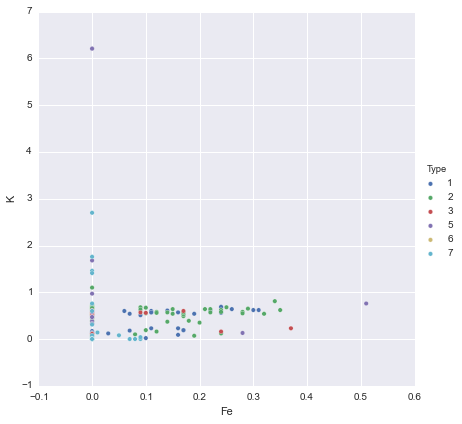

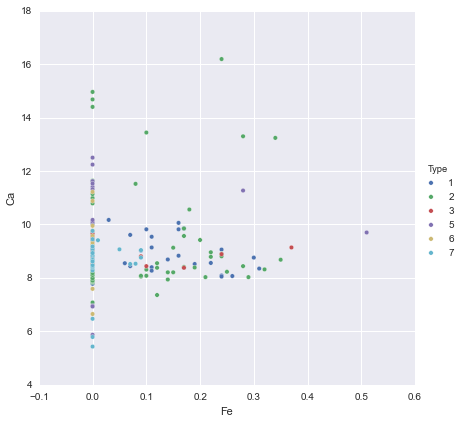

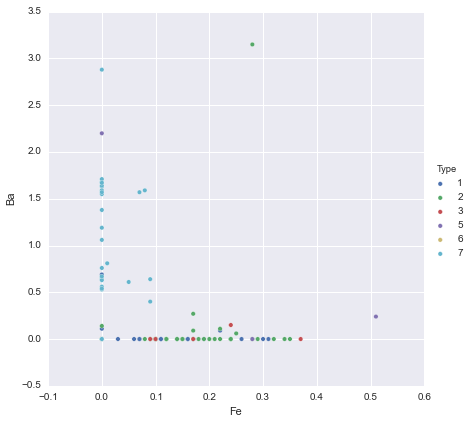

In [12]:
p_len = len(predictors)
for i in xrange(0, p_len ):
    for j in xrange(0, p_len):
        if i == j:
            continue

        sns.pairplot(glass_data, x_vars=[predictors[i]], y_vars=[predictors[j]], hue='Type',
                     size=6)
        plt.show()

Plot correlation matrix for predictors. See significant pairwise correlation only for Ca-refr.

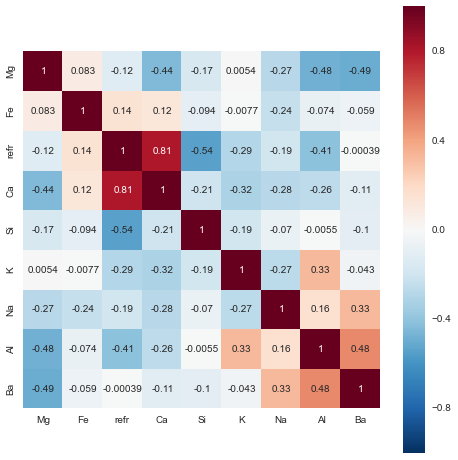

In [40]:
corr_mat = glass_data[predictors].corr()
corr_mat = mlib.cluster_corr_matrix(corr_mat)

plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, annot=True, square=True)
